In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Q1

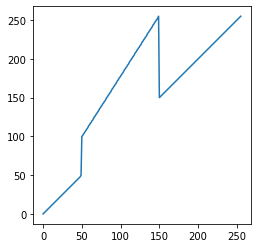

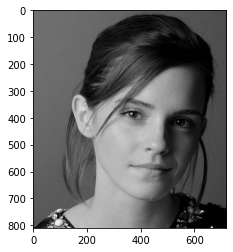

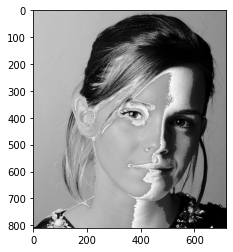

In [27]:
f = cv.imread(r'emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert f is not None

gamma = 0.2

t1 = np.linspace(0,50,50)

t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)


t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)


fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256

g = cv.LUT(f,t)

newf = cv.cvtColor(f,cv.COLOR_BGR2RGB)
newg = cv.cvtColor(g,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newf)
# fig2,ax2 = plt.subplots()
# ax2.plot(t)
fig3,ax3 = plt.subplots()
ax3.imshow(newg)

Q2

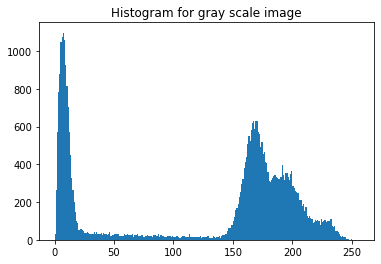

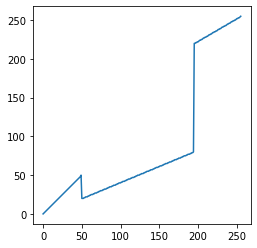

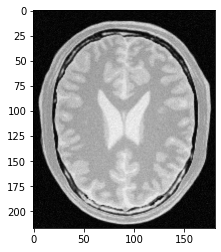

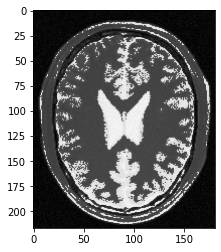

In [69]:
f = cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)

assert f is not None
hist = cv.calcHist(f,[0],None, [256], (0,256), accumulate=False)
plt.hist(f.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()
gamma = 0.2
lowerb = 50
upperb = 195
t1 = np.linspace(0,50,lowerb)
t2 = np.linspace(20,80,upperb-lowerb)
t3 = np.linspace(220,255,256-upperb)



t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256

g = cv.LUT(f,t)

newf = cv.cvtColor(f,cv.COLOR_BGR2RGB)
newg = cv.cvtColor(g,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newf)
fig3,ax3 = plt.subplots()
ax3.imshow(newg)

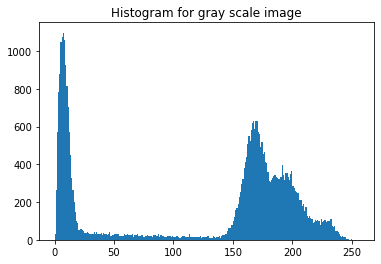

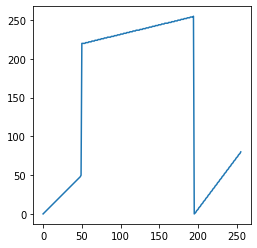

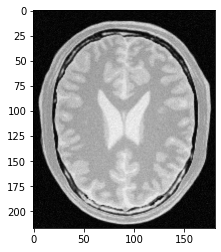

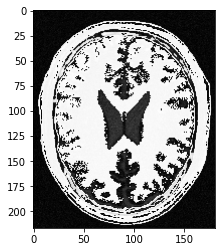

In [71]:
f = cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)

assert f is not None
hist = cv.calcHist(f,[0],None, [256], (0,256), accumulate=False)
plt.hist(f.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()
gamma = 0.2
lowerb = 50
upperb = 195
t1 = np.linspace(0,50,lowerb)
t2 = np.linspace(220,255,upperb-lowerb)
t3 = np.linspace(0,80,256-upperb)



t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256

g = cv.LUT(f,t)

newf = cv.cvtColor(f,cv.COLOR_BGR2RGB)
newg = cv.cvtColor(g,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newf)
fig3,ax3 = plt.subplots()
ax3.imshow(newg)

Q3

Text(0.5, 1.0, 'Histogram for Gamma corrected image')

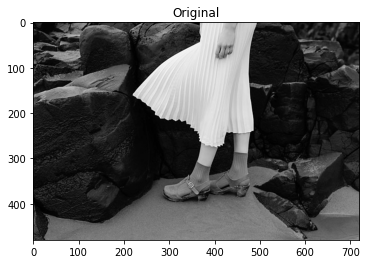

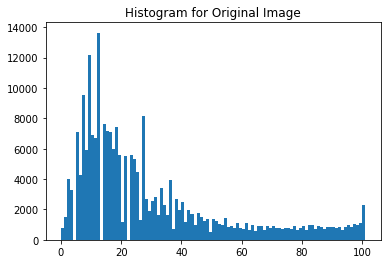

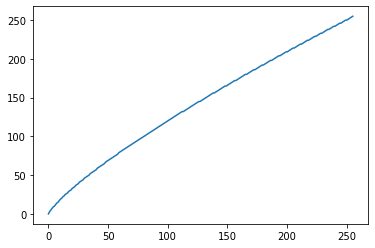

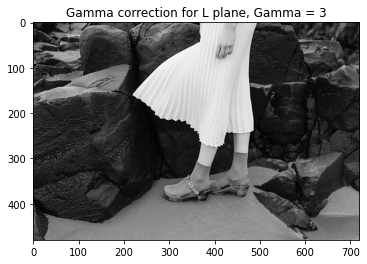

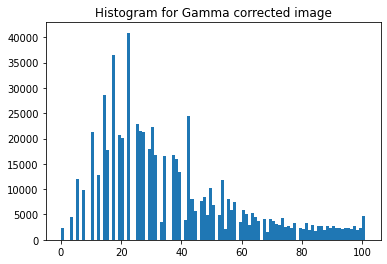

In [105]:
#f = cv.imread(r'highlights_and_shadows.jpg',cv.IMREAD_GRAYSCALE)
f = cv.imread(r'highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert f is not None
Lab = cv.cvtColor(f,cv.COLOR_BGR2LAB)
L,a,b = cv.split(Lab)
gamma = 0.8

t = np.array([(p/255)**gamma*255 for p in range(256)]).astype(np.uint8)
g = cv.LUT(L,t)
newL = cv.cvtColor(L,cv.COLOR_BGR2RGB)
newg = cv.cvtColor(g,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newL)

fig4,ax4 = plt.subplots()
hist1 = cv.calcHist(L,[0],None, [101], (0,101), accumulate=False)
ax4.hist(L.ravel(),101,[0,101])
ax4.set_title('Histogram for Original Image')



fig2,ax2 = plt.subplots()
ax1.set_title("Original")
ax2.plot(t)
fig3,ax3 = plt.subplots()

ax3.set_title("Gamma correction for L plane, Gamma = 3")
ax3.imshow(newg)

fig5,ax5 = plt.subplots()
hist2 = cv.calcHist(newg,[0],None, [101], (0,101), accumulate=False)
ax5.hist(newg.ravel(),101,[0,101])
ax5.set_title('Histogram for Gamma corrected image')



In [92]:
def displayImg(img,title):
    fig1,ax1 = plt.subplots()
    ax1.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    ax1.set_title(title)
def displayHist(img):
    fig4,ax4 = plt.subplots()
    hist1 = cv.calcHist(img,[0],None, [256], (0,256), accumulate=False)
    ax4.hist(img.ravel(),256,[0,256])
    ax4.set_title('Histogram for Original Image')
    return hist1

def nonZeroMin(arr):
    nMin = arr[0]
    for i in arr:
        if arr[i][0]<nMin and arr[i][0]>0:
            nMin = arr[i][0]
        if nMin==0:
            nMin = arr[i][0]
        
    return nMin
        



def eqImg(img):
    h =  cv.calcHist([img],[0],None,[256],[0,256])
    cdf = np.cumsum(h)/img.size
    scaledcdf = np.round([cdf*255]).astype(np.uint8)
    imgEqualized = cv.cvtColor(cv.LUT(img,scaledcdf),cv.COLOR_BGR2RGB)

    displayImg(imgEqualized,"Histogram Eq Using custom Function")
    # fig,ax = plt.subplots()
    # ax.plot(cdf)
    # displayImg(img)
    # displayHist(img)


Text(0.5, 1.0, 'Histogram for equalized image(in-built')

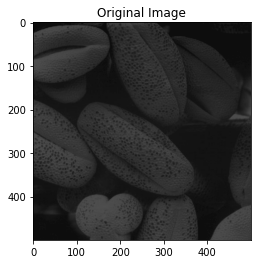

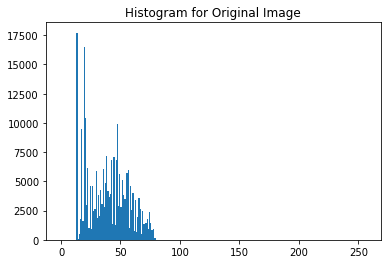

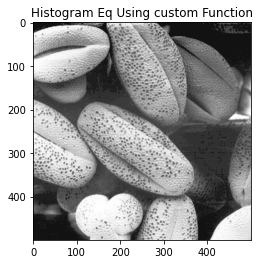

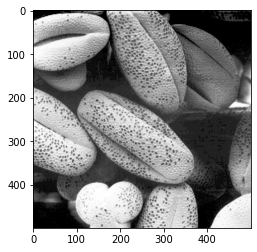

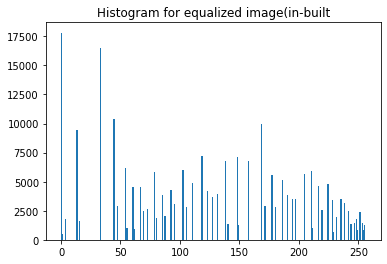

In [93]:
img = cv.imread("shells.png",cv.IMREAD_GRAYSCALE)

eqimg = cv.equalizeHist(img)
displayImg(img,"Original Image")
fig4,ax4 = plt.subplots()
hist1 = cv.calcHist(img,[0],None, [256], (0,256), accumulate=False)
ax4.hist(img.ravel(),256,[0,256])
ax4.set_title('Histogram for Original Image')
eqImg(img) #Custom Function

fig2,ax2 = plt.subplots()
ax2.imshow(cv.cvtColor(eqimg,cv.COLOR_BGR2RGB))

fig3,ax3 = plt.subplots()
hist2 = cv.calcHist(eqimg,[0],None, [256], (0,256), accumulate=False)
ax3.hist(eqimg.ravel(),256,[0,256])
ax3.set_title('Histogram for equalized image(in-built')



Q5

In [167]:
def zoomImage(img,s,mode="a"):
    rows = int(img.shape[0]*s)
    cols = int(img.shape[1]*s)
    zoomed = np.zeros((rows,cols),dtype=img.dtype)
    for i in range(rows):
        for j in range(cols):
            if mode =="b":
                rowf = i/s
                colf = j/s
                c1 = colf-int(colf)
                c2 = 1-c1
                r1 = rowf-int(rowf)
                r2 = 1-r1
           
                if int(colf)+1>= img.shape[1] or int(rowf)+1>=img.shape[0]:
                    zoomed[i,j] = img[int(i/s),int(j/s)]
                else:
                    p11 =  img[int(rowf),int(colf)]
                    p12 = img[int(rowf),int(colf)+1]
                    p22 = img[int(rowf)+1,int(colf)+1]
                    p21 = img[int(rowf)+1,int(colf)]

                    zoomed[i,j] = (p11*r2+p21*r1)*c2+ (p12*r2+p22*r1)*c1
            else:
                zoomed[i,j] = img[int(i/s),int(j/s)]
    if(s>1):

        croppedimg = zoomed[0:img.shape[0],0:img.shape[1]]
    else:
        croppedimg = zoomed
    displayImg(croppedimg,"Zoomed")


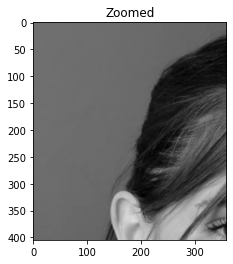

In [169]:
img = cv.imread('emma_gray.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
s =2
zoomImage(img,s,"b")
# displayImg(img,"")
# scaledimg =cv.resize(img,None,fx=s,fy=s,interpolation=cv.INTER_LINEAR)
# croppedimg = scaledimg[500:img.shape[0]+500,500:img.shape[1]+500]

# displayImg(croppedimg,"")

In [ ]:
Q7